In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
path = r"Downloads/historical_air_quality_2021_en.csv"
df = pd.read_csv(path, index_col = None)
df.head()

,Station ID,AQI index,Location,Station name,Url,Dominent pollutant,CO,Dew,Humidity,NO2,...,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Data Time Tz,Status,Alert level
0,8767.0,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,NaN,83.0,-,...,"1,009.00",NaN,102.00,-,27.0,3.6,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
1,8688.0,221.00,"21.0811211,105.8180306","United Nations International School of Hanoi, ...",https://aqicn.org/city/vietnam/hanoi/unis,aqi,-,NaN,77.0,-,...,"1,015.00",NaN,-,-,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
2,8641.0,281.00,"21.0215063,105.8188748","Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",https://aqicn.org/city/vietnam/hanoi/us-embassy,pm25,0.30,NaN,77.0,8.70,...,"1,015.00",NaN,281.00,2.10,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
3,13012.0,36.00,"13.998599,107.996482","Gia Lai/phường Thống Nhất - Pleiku, Vietnam",https://aqicn.org/city/vietnam/gia-lai/phuong-...,pm25,3.00,NaN,60.2,6.00,...,923.70,29.00,36.00,1.00,24.3,1.0,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
4,12488.0,68.00,"16.46226,107.596351","Thừa Thiên Huế/83 Hùng Vương, Vietnam",https://aqicn.org/city/vietnam/thua-thien-hue/...,pm25,2.00,NaN,88.0,-,...,"1,015.00",52.00,68.00,-,21.0,1.0,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?


In [3]:
df.Dew.isnull().sum()

1152

In [4]:
df.shape

(3415, 21)

In [5]:
df.columns

Index(['Station ID', 'AQI index', 'Location', 'Station name', 'Url',
       'Dominent pollutant', 'CO', 'Dew', 'Humidity', 'NO2', 'O3', 'Pressure',
       'PM10', 'PM2.5', 'SO2', 'Temperature', 'Wind', 'Data Time S',
       'Data Time Tz', 'Status', 'Alert level'],
      dtype='object')

In [6]:
df[['Status', 'Alert level']].isnull().sum()

Status         793
Alert level    793
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape
        

(1806, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 345 to 2621
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          1806 non-null   float64
 1   AQI index           1806 non-null   object 
 2   Location            1806 non-null   object 
 3   Station name        1806 non-null   object 
 4   Url                 1806 non-null   object 
 5   Dominent pollutant  1806 non-null   object 
 6   CO                  1806 non-null   object 
 7   Dew                 1806 non-null   float64
 8   Humidity            1806 non-null   float64
 9   NO2                 1806 non-null   object 
 10  O3                  1806 non-null   object 
 11  Pressure            1806 non-null   object 
 12  PM10                1806 non-null   object 
 13  PM2.5               1806 non-null   object 
 14  SO2                 1806 non-null   object 
 15  Temperature         1806 non-null   float64
 16  Wind

In [10]:
df['AQI index'].replace('-','0', regex = True, inplace = True)
df = df.rename(columns = {'AQI index': 'AQI'})

#df[['AQI index','Humidity','NO2','O3','Pressure','PM10','PM2.5','SO2', 'Temperature','Wind']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 345 to 2621
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          1806 non-null   float64
 1   AQI                 1806 non-null   object 
 2   Location            1806 non-null   object 
 3   Station name        1806 non-null   object 
 4   Url                 1806 non-null   object 
 5   Dominent pollutant  1806 non-null   object 
 6   CO                  1806 non-null   object 
 7   Dew                 1806 non-null   float64
 8   Humidity            1806 non-null   float64
 9   NO2                 1806 non-null   object 
 10  O3                  1806 non-null   object 
 11  Pressure            1806 non-null   object 
 12  PM10                1806 non-null   object 
 13  PM2.5               1806 non-null   object 
 14  SO2                 1806 non-null   object 
 15  Temperature         1806 non-null   float64
 16  Wind

In [12]:
df_1 = df[['AQI','Humidity','CO','Dew','NO2','O3','PM10','PM2.5','SO2', 'Temperature','Wind']].replace('-', '0', regex = True)
df_1 = df_1[['AQI','Humidity','CO','Dew','NO2','O3','PM10','PM2.5','SO2', 'Temperature','Wind']].astype('float64')

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 345 to 2621
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AQI          1806 non-null   float64
 1   Humidity     1806 non-null   float64
 2   CO           1806 non-null   float64
 3   Dew          1806 non-null   float64
 4   NO2          1806 non-null   float64
 5   O3           1806 non-null   float64
 6   PM10         1806 non-null   float64
 7   PM2.5        1806 non-null   float64
 8   SO2          1806 non-null   float64
 9   Temperature  1806 non-null   float64
 10  Wind         1806 non-null   float64
dtypes: float64(11)
memory usage: 169.3 KB


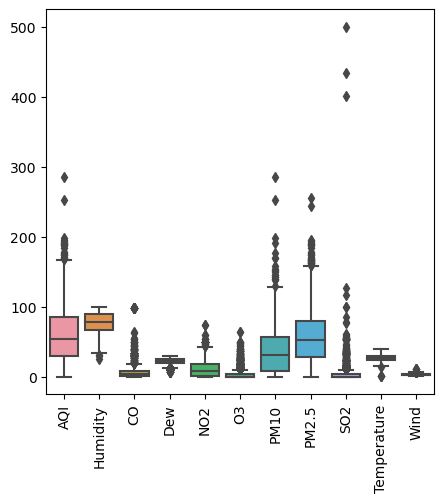

In [16]:
#Biểu đồ xác định ngoại lệ
plt.figure(figsize=(5,5))
sns.boxplot(data=df_1)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#Công thức hiệu chỉnh ngoại lệ
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).sum()

AQI             23
Humidity         3
CO             191
Dew             79
NO2             52
O3             221
PM10            20
PM2.5           35
SO2            246
Temperature      5
Wind            18
dtype: int64

In [15]:
mask = (df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))
mask

,AQI,Humidity,CO,Dew,NO2,O3,PM10,PM2.5,SO2,Temperature,Wind
345,False,False,False,False,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False,False
348,False,False,False,False,False,True,False,False,False,False,False
349,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2615,False,False,False,False,False,True,False,False,True,False,False
2617,True,False,False,True,False,False,False,True,False,False,False
2619,False,False,True,True,False,False,False,True,False,False,False
2620,False,False,False,True,False,False,False,False,False,False,False


In [16]:
for i in mask.columns:
    temp = df_1[i].median()
    df_1.loc[mask[i], i] = temp

In [17]:
((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).sum()

AQI            0
Humidity       0
CO             0
Dew            0
NO2            0
O3             0
PM10           0
PM2.5          0
SO2            0
Temperature    0
Wind           0
dtype: int64

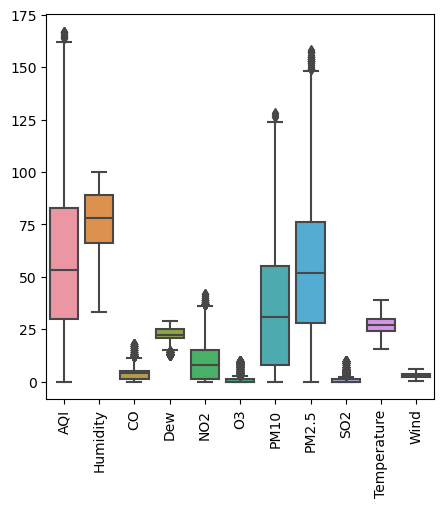

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_1)
plt.xticks(rotation='vertical')
plt.show()

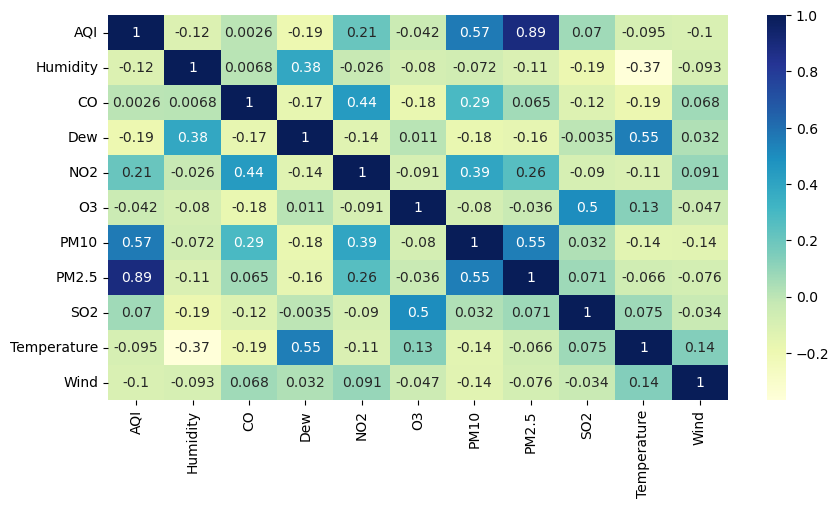

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df_1.corr(), cmap='YlGnBu',annot=True)
plt.show()

In [20]:
def SoSanh(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)
    # sử dụng linear regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score của Linear Regression:",r2_score(y_test,y_pred))
    #Sử dụng ridge
    model = Ridge(alpha=0.1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score của Ridge Regression:",r2_score(y_test,y_pred))
    # su dung random
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("R2_score cua random forest regression:", r2_score(y_test, y_pred))
    

In [21]:
features = ['Humidity','CO','Dew','NO2','O3','PM10','PM2.5','SO2','Temperature','Wind']
X = df_1[features]

In [22]:
y= df_1['AQI']

In [23]:
SoSanh(X,y)

R2_score của Linear Regression: 0.7763176455718656
R2_score của Ridge Regression: 0.7763176228690117
R2_score cua random forest regression: 0.8677142644431582
